In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

In [2]:
df = pd.read_csv('merge_data.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'order_id', 'date', 'payment', 'item_code', 'quantity',
       'unit_price_vat_excl', 'unit_cogs', 'unit_rrp_vat_excl', 'department',
       'channel', 'owner', 'site', 'CreatedAt', 'store_ca', 'location',
       'country', 'days_of_week', 'month', 'days', 'sales', 'item_name',
       'style', 'brand_id', 'name', 'group0_id', 'group0', 'group1_id',
       'group1', 'group2_id', 'category', 'gender', 'age', 'color', 'size'],
      dtype='object')

In [5]:
df.category.value_counts()

football     683974
running      358849
fitness      185077
lifestyle     60481
Name: category, dtype: int64

In [6]:
df_product=df.loc[df['category'] == "football"]

In [7]:
df_product.isnull().sum()

Unnamed: 0             0
order_id               0
date                   0
payment                0
item_code              0
quantity               0
unit_price_vat_excl    0
unit_cogs              0
unit_rrp_vat_excl      0
department             0
channel                0
owner                  0
site                   0
CreatedAt              0
store_ca               0
location               0
country                0
days_of_week           0
month                  0
days                   0
sales                  0
item_name              0
style                  0
brand_id               0
name                   0
group0_id              0
group0                 0
group1_id              0
group1                 0
group2_id              0
category               0
gender                 0
age                    0
color                  0
size                   0
dtype: int64

In [8]:
df_product.category.value_counts()

football    683974
Name: category, dtype: int64

In [9]:
df_product_features=df_product.sort_values('date').groupby(['date','country', 'unit_price_vat_excl', 'unit_cogs'], as_index=False)
df_product_features=df_product_features.agg({'quantity':['sum'], 'sales':['sum']})
df_product_features.columns=['date', 'country', 'unit_price_vat_excl', 'unit_cogs', 'quantity', 'sales']
df_product_features.head()

,date,country,unit_price_vat_excl,unit_cogs,quantity,sales
0,2019-06-01,Czech Republic,4.997287,2.807364,1,4.997287
1,2019-06-01,Czech Republic,5.605814,3.649225,1,5.605814
2,2019-06-01,Czech Republic,6.630620,0.070930,2,13.261240
3,2019-06-01,Czech Republic,6.630620,2.503101,5,33.153101
4,2019-06-01,Czech Republic,9.353488,5.406589,1,9.353488


In [10]:
df_product_features.quantity.sum()

748397

In [11]:
df_product_features['cost']=df_product_features['unit_cogs']*df_product_features['quantity']
df_product_features['profit']=df_product_features['sales']-df_product_features['cost']

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_36506/2500172788.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_product_features.corr()))
/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_36506/2500172788.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df_product_features.corr(), cmap="YlGnBu", annot=True, mask=mask)


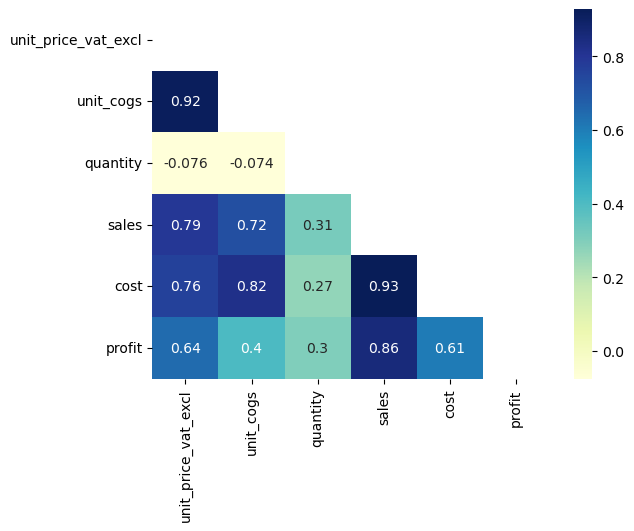

In [12]:
mask = np.triu(np.ones_like(df_product_features.corr()))
# plotting a triangle correlation heatmap
dataplot = sb.heatmap(df_product_features.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
mp.show()

In [13]:
df_f= df_product_features[['date', 'quantity', 'sales', 'cost', 'profit']]
df_final = df_f.groupby(['date']).sum()

In [14]:
df_final.shape

(957, 4)

In [15]:
#LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

from sklearn.preprocessing import StandardScaler

2022-12-05 14:05:43.025641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
df_final.reset_index(inplace=True)
df_final

,date,quantity,sales,cost,profit
0,2019-06-01,94,3001.739345,1747.215891,1254.523454
1,2019-06-02,2,16.670977,8.946124,7.724853
2,2019-06-03,19,722.812693,448.559690,274.253003
3,2019-06-04,637,25543.831709,15004.537597,10539.294112
4,2019-06-05,1254,44483.017968,12012.780620,32470.237348
...,...,...,...,...,...
952,2022-01-10,1308,50139.146167,31573.074806,18566.071361
953,2022-01-11,1278,50783.317583,31836.418992,18946.898591
954,2022-01-12,1265,41452.500481,25801.752713,15650.747768
955,2022-01-13,1424,43738.830676,27460.587984,16278.242691


In [17]:
train_dates=pd.to_datetime(df_final['date'])
train_dates

0     2019-06-01
1     2019-06-02
2     2019-06-03
3     2019-06-04
4     2019-06-05
         ...    
952   2022-01-10
953   2022-01-11
954   2022-01-12
955   2022-01-13
956   2022-01-14
Name: date, Length: 957, dtype: datetime64[ns]

In [18]:
cols=list(df_final)[1:5]
cols

['quantity', 'sales', 'cost', 'profit']

In [19]:
df_for_training=df_final[cols].astype(float)

<AxesSubplot:>

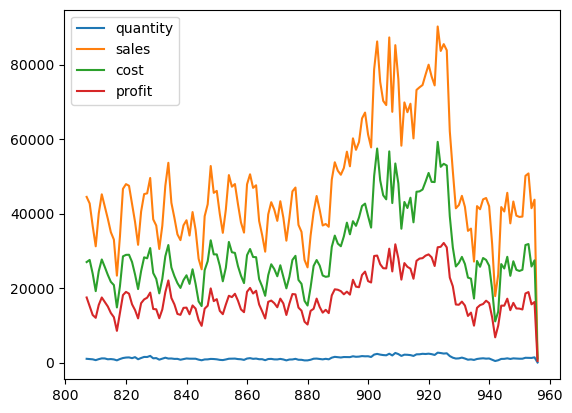

In [20]:
df_for_plot=df_for_training.tail(150)
df_for_plot.plot.line()

In [21]:
scaler=StandardScaler()
scaler=scaler.fit(df_for_training)
df_for_training_scaled=scaler.transform(df_for_training)

In [22]:
trainX = []
trainY = []

n_feature=1
n_past=14

for i in range(n_past, len(df_for_training_scaled)-n_feature+1):
    trainX.append(df_for_training_scaled[i-n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i+n_feature-1:i+n_feature, 0])

trainX, trainY=np.array(trainX), np.array(trainY)

print('trainX shape=={}'.format(trainX.shape))
print('trainY shape=={}'.format(trainY.shape))

trainX shape==(943, 14, 4)
trainY shape==(943, 1)


In [23]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary

history = model.fit(trainX, trainY, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

2022-12-05 14:07:55.559372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
53/53 [==============================] - 4s 29ms/step - loss: 0.3406 - val_loss: 5.7891
Epoch 2/200
53/53 [==============================] - 1s 13ms/step - loss: 0.2527 - val_loss: 1.3183
Epoch 3/200
53/53 [==============================] - 1s 11ms/step - loss: 0.2332 - val_loss: 0.5492
Epoch 4/200
53/53 [==============================] - 1s 11ms/step - loss: 0.2074 - val_loss: 1.1691
Epoch 5/200
53/53 [==============================] - 1s 11ms/step - loss: 0.2026 - val_loss: 0.7009
Epoch 6/200
53/53 [==============================] - 1s 13ms/step - loss: 0.2083 - val_loss: 0.9286
Epoch 7/200
53/53 [==============================] - 1s 11ms/step - loss: 0.1892 - val_loss: 0.7199
Epoch 8/200
53/53 [==============================] - 1s 10ms/step - loss: 0.1766 - val_loss: 0.6467
Epoch 9/200
53/53 [==============================] - 1s 10ms/step - loss: 0.1864 - val_loss: 0.6223
Epoch 10/200
53/53 [==============================] - 1s 9ms/step - loss: 0.1851 - val_loss: 0.8898


53/53 [==============================] - 1s 11ms/step - loss: 0.0839 - val_loss: 1.4406
Epoch 83/200
53/53 [==============================] - 1s 11ms/step - loss: 0.0804 - val_loss: 1.3643
Epoch 84/200
53/53 [==============================] - 1s 12ms/step - loss: 0.0794 - val_loss: 1.4741
Epoch 85/200
53/53 [==============================] - 1s 13ms/step - loss: 0.0822 - val_loss: 1.4045
Epoch 86/200
53/53 [==============================] - 1s 12ms/step - loss: 0.0852 - val_loss: 1.4147
Epoch 87/200
53/53 [==============================] - 1s 12ms/step - loss: 0.0804 - val_loss: 1.2865
Epoch 88/200
53/53 [==============================] - 1s 12ms/step - loss: 0.0790 - val_loss: 1.4323
Epoch 89/200
53/53 [==============================] - 1s 10ms/step - loss: 0.0852 - val_loss: 1.9386
Epoch 90/200
53/53 [==============================] - 1s 10ms/step - loss: 0.0793 - val_loss: 1.5017
Epoch 91/200
53/53 [==============================] - 1s 10ms/step - loss: 0.0784 - val_loss: 1.5853
Epo

53/53 [==============================] - 1s 10ms/step - loss: 0.0505 - val_loss: 3.0292
Epoch 163/200
53/53 [==============================] - 1s 10ms/step - loss: 0.0503 - val_loss: 3.9250
Epoch 164/200
53/53 [==============================] - 1s 10ms/step - loss: 0.0430 - val_loss: 2.8240
Epoch 165/200
53/53 [==============================] - 1s 10ms/step - loss: 0.0480 - val_loss: 2.2514
Epoch 166/200
53/53 [==============================] - 1s 10ms/step - loss: 0.0513 - val_loss: 2.7552
Epoch 167/200
53/53 [==============================] - 1s 10ms/step - loss: 0.0451 - val_loss: 3.2768
Epoch 168/200
53/53 [==============================] - 1s 10ms/step - loss: 0.0506 - val_loss: 3.1866
Epoch 169/200
53/53 [==============================] - 1s 10ms/step - loss: 0.0406 - val_loss: 2.5677
Epoch 170/200
53/53 [==============================] - 1s 10ms/step - loss: 0.0461 - val_loss: 4.4775
Epoch 171/200
53/53 [==============================] - 1s 11ms/step - loss: 0.0426 - val_loss: 2

In [24]:
n_future=365
forecast_period_dates=pd.date_range(list(train_dates)[-1], periods=n_future, freq='D').tolist()

In [25]:
forecast = model.predict(trainX[-n_future:])
forecast_copies=np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'quantity':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])

original = df_final[['date', 'quantity']]
original['date']=pd.to_datetime(original['date'])

12/12 [==============================] - 0s 7ms/step


/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_36506/2576033191.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['date']=pd.to_datetime(original['date'])


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='quantity'>

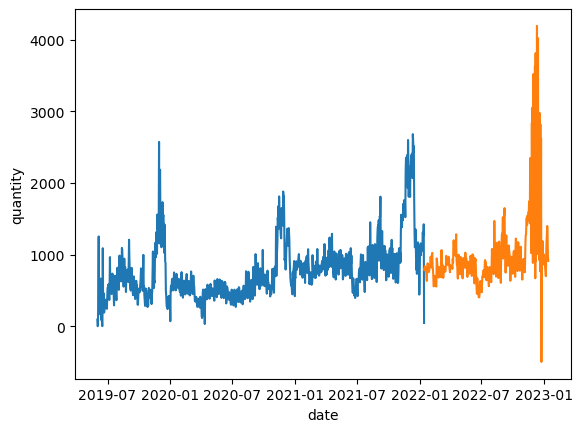

In [26]:
sns.lineplot(original['date'], original['quantity'])
sns.lineplot(df_forecast['date'], df_forecast['quantity'])

In [27]:
df_forecast.round(0)

,date,quantity
0,2022-01-14,797.0
1,2022-01-15,782.0
2,2022-01-16,837.0
3,2022-01-17,838.0
4,2022-01-18,815.0
...,...,...
360,2023-01-09,1275.0
361,2023-01-10,1400.0
362,2023-01-11,1320.0
363,2023-01-12,999.0


In [28]:
#CNN 
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Flatten

Epoch 1/200
53/53 [==============================] - 1s 6ms/step - loss: 0.2656 - val_loss: 0.8951
Epoch 2/200
53/53 [==============================] - 0s 3ms/step - loss: 0.1792 - val_loss: 1.3365
Epoch 3/200
53/53 [==============================] - 0s 3ms/step - loss: 0.1538 - val_loss: 0.7678
Epoch 4/200
53/53 [==============================] - 0s 3ms/step - loss: 0.1535 - val_loss: 1.3008
Epoch 5/200
53/53 [==============================] - 0s 3ms/step - loss: 0.1412 - val_loss: 1.0318
Epoch 6/200
53/53 [==============================] - 0s 3ms/step - loss: 0.1302 - val_loss: 0.8942
Epoch 7/200
53/53 [==============================] - 0s 3ms/step - loss: 0.1203 - val_loss: 1.3492
Epoch 8/200
53/53 [==============================] - 0s 3ms/step - loss: 0.1222 - val_loss: 1.3634
Epoch 9/200
53/53 [==============================] - 0s 3ms/step - loss: 0.1079 - val_loss: 0.7768
Epoch 10/200
53/53 [==============================] - 0s 6ms/step - loss: 0.1114 - val_loss: 0.7972
Epoch 11/

53/53 [==============================] - 0s 3ms/step - loss: 0.0233 - val_loss: 1.1455
Epoch 84/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 1.2152
Epoch 85/200
53/53 [==============================] - 0s 5ms/step - loss: 0.0199 - val_loss: 1.1430
Epoch 86/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 1.1194
Epoch 87/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 1.0697
Epoch 88/200
53/53 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 1.1697
Epoch 89/200
53/53 [==============================] - 0s 4ms/step - loss: 0.0211 - val_loss: 1.0131
Epoch 90/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0180 - val_loss: 1.1493
Epoch 91/200
53/53 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 1.1127
Epoch 92/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0244 - val_loss: 1.0983
Epoch 93/200


53/53 [==============================] - 0s 3ms/step - loss: 0.0092 - val_loss: 1.0256
Epoch 165/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 1.1061
Epoch 166/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 1.1125
Epoch 167/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 1.0639
Epoch 168/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 1.0901
Epoch 169/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 1.0363
Epoch 170/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 1.0801
Epoch 171/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0098 - val_loss: 1.0071
Epoch 172/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 1.0620
Epoch 173/200
53/53 [==============================] - 0s 3ms/step - loss: 0.0070 - val_loss: 1.0530
Epoc

/var/folders/p7/8dgs9p213n5g4cwfv5162vnm0000gn/T/ipykernel_36506/80498196.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['date']=pd.to_datetime(original['date'])
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explici

<AxesSubplot:xlabel='date', ylabel='quantity'>

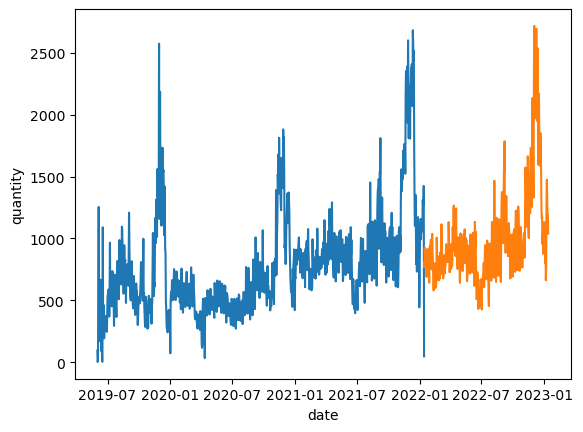

In [29]:
model_cnn = Sequential()
model_cnn.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))

model_cnn.compile(optimizer='adam', loss='mse')
model_cnn.summary

history_cnn = model_cnn.fit(trainX, trainY, epochs=200, batch_size=16, validation_split=0.1, verbose=1)

n_future=365
forecast_period_dates=pd.date_range(list(train_dates)[-1], periods=n_future, freq='D').tolist()

forecast = model_cnn.predict(trainX[-n_future:])

forecast_copies=np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'quantity':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])

original = df_final[['date', 'quantity']]
original['date']=pd.to_datetime(original['date'])

sns.lineplot(original['date'], original['quantity'])
sns.lineplot(df_forecast['date'], df_forecast['quantity'])

In [30]:
df_forecast.round(0)

,date,quantity
0,2022-01-14,803.0
1,2022-01-15,767.0
2,2022-01-16,925.0
3,2022-01-17,851.0
4,2022-01-18,859.0
...,...,...
360,2023-01-09,1474.0
361,2023-01-10,1318.0
362,2023-01-11,1176.0
363,2023-01-12,1190.0
